# Lab 3 Assignment
__Authors__: Dan Davieau, Paul Panek, Olga Tanyuk, Nathan Wall

***
## Business Understanding  
<font color=blue>Describe the purpose of the data set you selected (i.e., why was this data collected in the first place?). How will you measure the effectiveness of a good algorithm? Why does your chosen validation method make sense for this specific
dataset and the stakeholders needs?</font>

For this analysis we will be borrowing the "raw_residential_data" and "raw_address_points.csv" data sets from Christopher Coreeas's *"DC Residential Properties"* Kaggle: https://www.kaggle.com/christophercorrea/dc-residential-properties. The data was originally collected for planning and management of Washington, D.C. by local government agencies.

Understanding the features of D.C.'s neighborhoods (aka wards) can provide insight for real estate agencies. Clusters within and between the wards can help identify areas to search based on client needs.

We will measure effectivenss of different clustering algorithms to seperate various types of homes from the DC data set. For example single family homes on large plots of land should be categorized differently than downtown flats in a 10 story building. 

The process of evaluating will be based on two criteria:  

>  1) Silhouette Coefficient and other statistical measures to determine the correct amount of clusters to use and our ability to seperate them into distinct categories.

>  2) Manual evaluation of the observations to identify the similarity between clusters with our human ability to differentiate between different styles of homes.

***
## Data Understanding 1
<font color=blue>Describe the meaning and type of data (scale, values, etc.) for each attribute in the data file. Verify data quality: Are there missing values? Duplicate data? Outliers? Are those mistakes? How do you deal with these problems?</font>

### raw_residential_data.csv 
The residential data contains housing characteristics for residential properties. It was created as part of the D.C. Geographic Information System (DC GIS) for the D.C. Office of the Chief Technology Officer (OCTO) and participating D.C. government agencies.

Descriptions for the data are incomplete however the following was included:  

> __OBJECTID:__ Auto-generated internal unique ID  
__SSL__: Square, suffix, lot ID  
__BATHRM__: Number of full bathrooms  
__HF_BATHRM__: Number of half bathrooms (no shower or tub)  
__HEAT__: Heating code *0 = No Data, 1 = Forced Air, 2 = Air-Oil, 3 = Wall Furnace, 4 = Electric Rad, 5 = Elec Base Brd, 
6 = Water Base Brd, 7 = Warm Cool, 8 = Ht Pump, 9 = Evp Cool, 10 = Air Exchng, 11 = Gravity Furnac, 12 = Ind Unit, 13 = Hot Water Rad*  
__AC:__ Air conditioning (Y/N)  
__NUM_UNITS:__ Number of units  
__ROOMS:__ Number of rooms  
__BEDRM:__ Number of bedrooms  
__AYB:__ The earliest time the main portion of the building was built. It is not affected by subsequent construction.  
__STORIES:__ Stories  
__SALE_NUM:__ Sale number  
__GBA:__ Gross building area in square feet  
__STYLE:__ Style code  *0 = Default, 1 = 1 Story, 2 = 1.5 Story Unfin, 3 = 1.5 Story Fin, 4 = 2 Story, 5 = 2.5 Story Unfin, 6 = 2.5 Story Fin, 7 = 3 Story, 8 = 3.5 Story, 9 = 3.5 Story Fin, 10 = 4 Story, 11 = 4.5 Story Unfin, 12 = 4.5 Story Fin, 13 = Bi-Level, 14 = Split Level, 15 = Split Foyer, 94 = Outbuildings, 99 = Vacant*  
__STRUCT:__ Structure code *0 = Default, 1 = Single, 2 = Multi, 4 = Town End, 5 = Town Inside, 6 = Row End, 7 = Row Inside, 8 = Semi-Detached, 13 = Vacant Land*  
__EXTWALL:__ Exterior wall code *0 = Default, 1 = Plywood, 2 = Hardboard, 3 = Metal Siding, 4 = Vinyl Siding, 5 = Stucco, 6 = Wood Siding, 7 = Shingle, 8 = SPlaster, 9 = Rustic Log, 10 = Brick Veneer, 11 = Stone Veneer, 12 = Concrete Block, 13 = Stucco Block, 14 = Common Brick, 15 = Face Brick, 16 = Adobe, 17 = Stone, 18 = Concrete, 19 = Aluminum, 20 = Brick/Stone, 21 = Brick/Stucco, 22 = Brick/Siding, 23 = Stone/Stucco, 24 = Stone/Siding*  
__ROOF:__ Roof type code *0 = Typical, 1 = Comp Shingle, 2 = Built Up, 3 = Shingle, 4 = Shake, 5 = Metal- Pre, 6 = Metal- Sms, 7 = Metal- Cpr, 8 = Composition Ro, 9 = Concrete Tile, 10 = Clay Tile, 11 = Slate, 12 = Concrete, 13 = Neopren, 14 = Water Proof, 15 = Wood- FS*  
__INTWALL:__  Interior wall code *, 0 = Default, 1 = Resiliant, 2 = Carpet, 3 = Wood Floor, 4 = Ceramic Tile, 5 = Terrazo, 6 = Hardwood, 7 = Parquet, 8 = Vinyl Comp, 9 = Vinyl Sheet, 10 = Lt Concrete, 11 = Hardwood/Carp*  
__KITCHENS:__ Number of kitchens  
__FIREPLACES:__ Number of fireplaces  
__LANDAREA:__ Land area of property in square feet  
__LATITUDE:__ Lattitude of address  
__LONGITUDE:__ Longitude of Address  
__ASSESSMENT_NBHD:__ DC Neighborhood  
__WARD:__ DC Wards  

### raw_address_points.csv
The raw address points data contains lattitude and longitude coordinates by street address among other attributes as of July 2018. This file is part of the Master Address Repository (MAR) for the D.C. Office of the Chief Technology Officer and DC Department of Consumer and Regulatory Affairs.  

After analyzing we concluded that the "SSL" attribute is our only option to join the raw residential and address points data.

There was no attribute level metadata included with this data. However upon researching http://opendata.dc.gov/datasets/3c8c90b33dbe41cd965634dda58dfd80_7 we found:  
> __SSL:__ Represents "Square Suffix and Lot".  
*The relationship between an address and an SSL is a many to many relationship. One SSL (Square, Suffix, Lot) can have multiple addresses located on it. This often includes garden style apartment complexes as well as corner addresses with separate addresses facing each adjacent street. One address can also sit upon multiple properties. One single family residence can sit upon multiple lots. The address records only contain one 'base' SSL (usually comes from OwnerPly). The cross reference table contains the many to many relationship between an address and an SSL. Some addresses do not have an associated SSL (such as some metro entrances or many addresses on Federal property). In, the address table, each address record will only be associated with one SSL. That SSL will be the base SSL, which is the SSL under which the address point is located.*

We have a total of 107,154 residential observations with 39 attributes.
We are unable to match 670 of the 107,154 observations in the join. For now we will exclude them from our analysis. 

In [1]:
#Residential Data
# import os
# path="C:/Users/danie/Documents/GitHub/DataMiningGroupProjects/Lab 3"
# os.chdir(path)
import pandas as pd
import numpy as np
df1 = pd.read_csv('Data/raw_residential_data.csv',low_memory=False)
df2 = pd.read_csv('Data/raw_address_points.csv',low_memory=False)
df1.info()
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107154 entries, 0 to 107153
Data columns (total 39 columns):
OBJECTID             107154 non-null int64
SSL                  107154 non-null object
BATHRM               107127 non-null float64
HF_BATHRM            107126 non-null float64
HEAT                 107127 non-null float64
HEAT_D               107127 non-null object
AC                   107127 non-null object
NUM_UNITS            107127 non-null float64
ROOMS                107110 non-null float64
BEDRM                107123 non-null float64
AYB                  107141 non-null float64
YR_RMDL              49446 non-null float64
EYB                  107154 non-null int64
STORIES              107080 non-null float64
SALEDATE             107154 non-null object
PRICE                87866 non-null float64
QUALIFIED            107154 non-null object
SALE_NUM             107154 non-null int64
GBA                  107154 non-null int64
BLDG_NUM             107154 non-null int64
STYLE 

Below we drop redundant attributes, subset our variables of interest and assess NULL values and potential outliers that need to be addressed.

In [2]:
#Identify all categorical variables
categories = [['CNDTN_D','CNDTN'],['HEAT_D','HEAT'],['STYLE_D','STYLE'],['STRUCT_D','STRUCT'],['GRADE_D','GRADE'],['ROOF_D','ROOF'],['EXTWALL_D','EXTWALL'],['INTWALL_D','INTWALL']]
cat_drop = []
for c in categories:
    round(df1[c[1]])
    cat_drop.append(c[0])
# eliminate redundant dummy variables
df1.drop(cat_drop, inplace=True, axis=1)
df1.describe(include='all')

,OBJECTID,SSL,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,...,GRADE,CNDTN,EXTWALL,ROOF,INTWALL,KITCHENS,FIREPLACES,USECODE,LANDAREA,GIS_LAST_MOD_DTTM
count,107154.00000,107154,107127.000000,107126.000000,107127.000000,107127,107127.000000,107110.000000,107123.000000,107141.000000,...,107127.000000,107127.000000,107127.000000,107127.000000,107127.000000,107126.000000,107126.000000,107154.000000,107154.000000,107154
unique,NaN,107087,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
top,NaN,5881S 0004,NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-07-22T18:01:43.000Z
freq,NaN,5,NaN,NaN,NaN,66554,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,107154
mean,53577.50000,NaN,2.033194,0.607014,7.647941,NaN,1.198157,7.360181,3.373001,1929.684761,...,4.267384,3.524788,13.361113,3.989965,6.144576,1.219405,0.620662,13.138390,3419.642029,NaN
std,30932.83971,NaN,1.064627,0.616420,5.039394,NaN,0.597304,2.345917,1.150341,94.585682,...,1.367921,0.716789,3.928077,3.349059,1.957959,0.621446,0.894729,4.992594,6122.659252,NaN
min,1.00000,NaN,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,26789.25000,NaN,1.000000,0.000000,1.000000,NaN,1.000000,6.000000,3.000000,1914.000000,...,3.000000,3.000000,14.000000,1.000000,6.000000,1.000000,0.000000,11.000000,1599.000000,NaN
50%,53577.50000,NaN,2.000000,1.000000,7.000000,NaN,1.000000,7.000000,3.000000,1930.000000,...,4.000000,3.000000,14.000000,2.000000,6.000000,1.000000,0.000000,12.000000,2363.000000,NaN
75%,80365.75000,NaN,3.000000,1.000000,13.000000,NaN,1.000000,8.000000,4.000000,1947.000000,...,5.000000,4.000000,14.000000,6.000000,6.000000,1.000000,1.000000,13.000000,4199.000000,NaN


We now have 31 attributes but several have null values. For each of them with 100 or fewer nulls we will impute the missing values using the most common class or median value. However, the year remodeled, & price stand out and will probably need to be treated differently.

For the year remodeled we will assume that variable is missing when no remodels have been done to the home. Thus, converting the year to bins and treating the 57k with no remodel year as there own class. Clusters with a high proportion of these class homes may provide insights into homes for contractors to target.

The price of each property observation is as of the last sale. Considering volatility in the housing market and inflation over time we chose to leave it out of our analysis.

In addition to the price category we will also drop several other codes that we have deemed not useful.

In [3]:
bins = [0, 1960, 1970, 1980, 1990, 2000, 2010, 2020]
labels = ['50+','50','40','30','20','10','0']
df1['YR_RMDL_ClASS'] = pd.cut(df1['YR_RMDL'], bins=bins, labels=labels)
df1['YR_RMDL_ClASS'] = df1['YR_RMDL_ClASS'].replace(np.nan, 'NONE', regex=True)
#eliminate unnecessary variables
df1.drop(['PRICE','QUALIFIED','BLDG_NUM','GRADE','CNDTN','EYB','USECODE','GIS_LAST_MOD_DTTM','YR_RMDL','SALEDATE'], inplace=True, axis=1)

In [4]:
from sklearn.base import TransformerMixin
class DataFrameImputer(TransformerMixin):
    def __init__(self):
        """Impute missing values. Categorical are imputed with the most frequent value.
        Others are imputed with mean."""
    def fit(self, X, y=None):
        self.fill = pd.Series([X[c].value_counts().index[0]
            if X[c].dtype == np.dtype('O') else X[c].median() for c in X],
            index=X.columns)
        return self
    def transform(self, X, y=None):
        return X.fillna(self.fill)
df = DataFrameImputer().fit_transform(df1)
int_col = ['BATHRM','HF_BATHRM','HEAT','NUM_UNITS','ROOMS','BEDRM','AYB','STORIES','STYLE','STRUCT',
           'EXTWALL','ROOF','INTWALL','KITCHENS','FIREPLACES','LANDAREA']
for i in int_col:
    df[i] = df[i].astype('int64')
df.describe(include='all')

,OBJECTID,SSL,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,...,GBA,STYLE,STRUCT,EXTWALL,ROOF,INTWALL,KITCHENS,FIREPLACES,LANDAREA,YR_RMDL_ClASS
count,107154.00000,107154,107154.000000,107154.000000,107154.000000,107154,107154.000000,107154.000000,107154.000000,107154.000000,...,107154.000000,107154.000000,107154.000000,107154.000000,107154.000000,107154.000000,107154.000000,107154.000000,107154.000000,107154
unique,NaN,107087,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8
top,NaN,5881S 0004,NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NONE
freq,NaN,5,NaN,NaN,NaN,66581,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57708
mean,53577.50000,NaN,2.033186,0.607117,7.647778,NaN,1.198107,7.360033,3.372893,1929.684799,...,1713.966394,4.339894,5.012487,13.361274,3.989464,6.144540,1.219348,0.620499,3419.642029,NaN
std,30932.83971,NaN,1.064493,0.616372,5.038769,NaN,0.597237,2.345446,1.150193,94.579944,...,881.222668,1.545504,2.874190,3.927595,3.348786,1.957714,0.621375,0.894668,6122.659252,NaN
min,1.00000,NaN,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,26789.25000,NaN,1.000000,0.000000,1.000000,NaN,1.000000,6.000000,3.000000,1914.000000,...,1190.000000,4.000000,1.000000,14.000000,1.000000,6.000000,1.000000,0.000000,1599.000000,NaN
50%,53577.50000,NaN,2.000000,1.000000,7.000000,NaN,1.000000,7.000000,3.000000,1930.000000,...,1480.000000,4.000000,7.000000,14.000000,2.000000,6.000000,1.000000,0.000000,2363.000000,NaN
75%,80365.75000,NaN,3.000000,1.000000,13.000000,NaN,1.000000,8.000000,4.000000,1947.000000,...,1966.000000,4.000000,7.000000,14.000000,6.000000,6.000000,1.000000,1.000000,4199.000000,NaN


We now have a cleaned up set of 22 different attributes of over 107k homes with all the missing values imputed. Before we begin analysis and clustering of our data we will explore these attributes a little further to understand any transformations that may be required or any outliers that need to be addressed.
***  

##### Additional Outliers to be Addressed  

__Gross Building Area (GBA) Extremes__  
These are mostly entire appartment buildings or perhaps hotels. We may wish use this later for investing clients but for now we are focused on residential clients. We will exclude any greater than 3200 square feet.

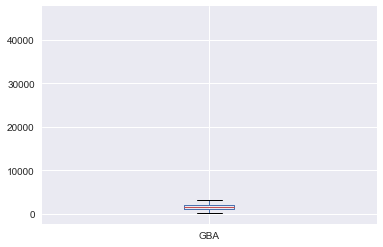

In [5]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
aa = df.boxplot(column='GBA',autorange=True)

***
__Stories > 200__  
These are likely reporting errors as the there is a limit to the height of building in DC that would prevent any building being over 200 stories. This causes us to question any of the validity of the data in these observations, thus we will remove them from our data.

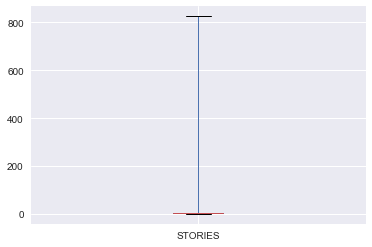

In [6]:
a = df.boxplot(column='STORIES',autorange=True)

***
__Year Built (AYB) < 1500__  
While it may be possible from some homes to be originally built prior to 1900, these earlier homes represent a very small proportion of our data. The majority of them have years reported as 50 or below. We will remove those observations from our data.

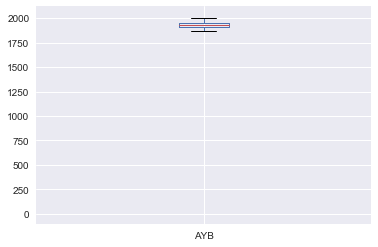

In [7]:
b = df.boxplot(column='AYB',autorange=True)

***
__Style > 25__  
Style Dummy variables greater than 25 represent "Outbuildings" and "Vacants". We will not include these in our analysis.
***

__Kitchens > 20__  
There is only a single home with > 20 kitchens. This appears to be a reporting error and will be excluded from analyis.

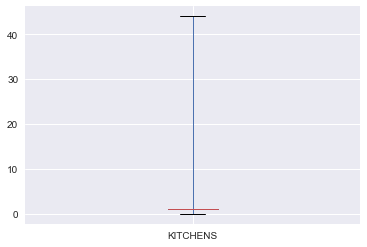

In [8]:
c = df.boxplot(column='KITCHENS',autorange=True)

***
__Rooms > 100 and BedRooms > Rooms__
Based on the square footage for one home with > 100 rooms; it is likely this is a reporting error. 
Additionally any scenario where the count of bedrooms is greater the count of rooms is impossible.

These cases will be excluded from our analysis

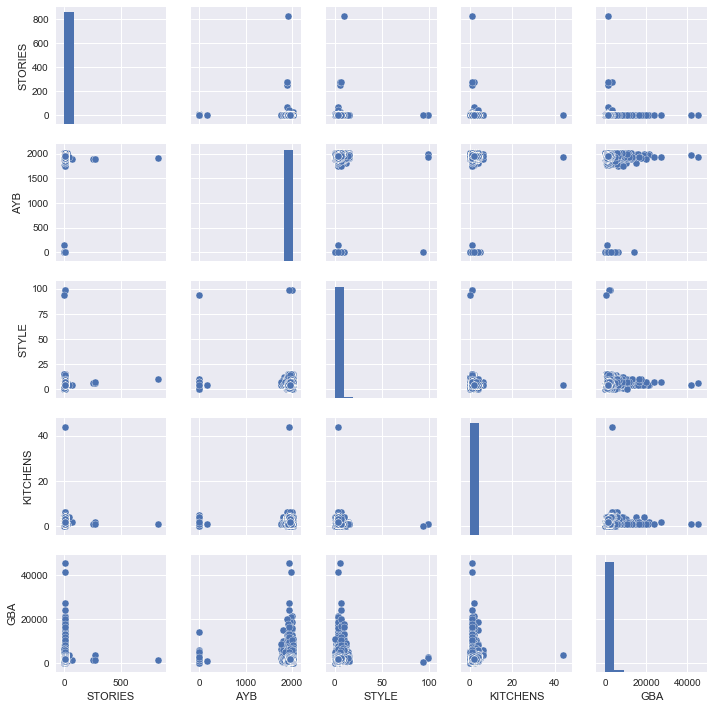

In [9]:
#Plots before outlier Removals
plotVar = ['STORIES','AYB','STYLE','KITCHENS','GBA']
sns.pairplot(df[plotVar], size=2)

Below we remove outliers and replot to see *some* improvement in the distributions and colinearity is more legible.

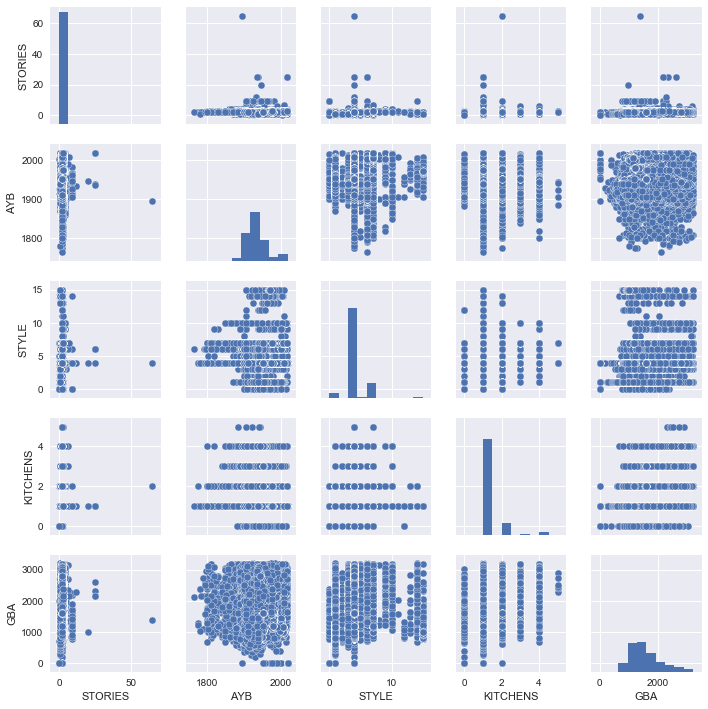

In [10]:
#remove false records and replot
df = df[df.STORIES < 200]
df = df[df.AYB > 1500]
df = df[df.STYLE < 25]
df = df[df.KITCHENS < 20]
df = df[df.ROOMS < 100]
df = df[df.ROOMS >= df.BEDRM]
df = df[df.GBA < 3200]
sns.pairplot(df[plotVar], size=2)

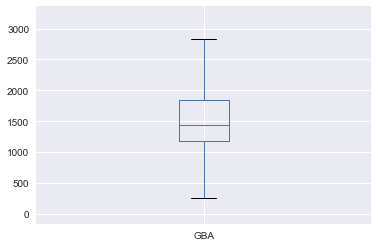

In [11]:
aa = df.boxplot(column='GBA',autorange=True)

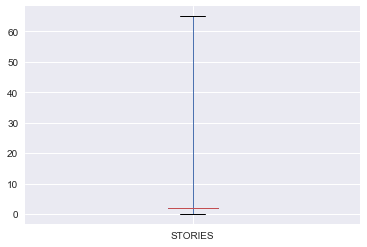

In [12]:
a = df.boxplot(column='STORIES',autorange=True)

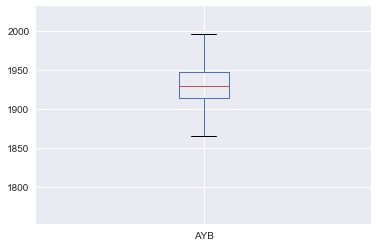

In [13]:
b = df.boxplot(column='AYB',autorange=True)

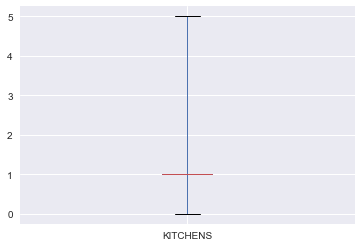

In [14]:
c = df.boxplot(column='KITCHENS',autorange=True)

***
## Data Understanding 2
<font color=blue>Visualize the any important attributes appropriately. Important: Provide an interpretation for any charts or graphs.</font>

To help clients understand home types in various wards we have to join the 2 datasets. This gives discrete lattitude/longitude location with addresses and other attributes combined. 

Not all address information is available for all the homes; for the purposes of this analysis we will only consider homes which we have neighborhood information available.

In [15]:
# subset the variables of interest that we care about and inner join the two datasets 
df2 = df2.drop_duplicates(['SSL'], keep='last').set_index("SSL")[["LATITUDE","LONGITUDE","ASSESSMENT_NBHD","WARD"]]
df = pd.merge(df,df2,how="inner",on="SSL")

(Text(0.5,0,'Latitude'), Text(0,0.5,'Longitude'))

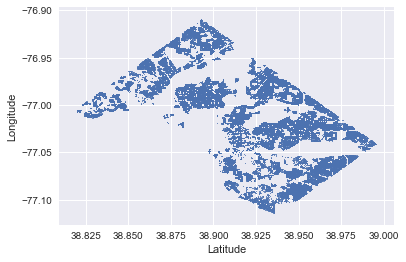

In [16]:
plt.figure()
plt.scatter(df.LATITUDE, df.LONGITUDE, cmap=plt.cm.rainbow, s=1, linewidths=0)
plt.xlabel('Latitude'), plt.ylabel('Longitude')

Below we can see number of homes by ward. Ward 4 having the most and ward 2 the least.

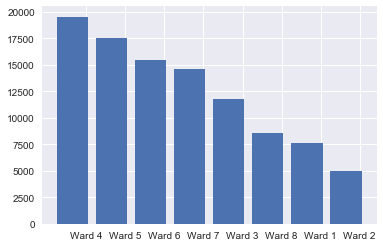

In [17]:
from collections import Counter
counts = Counter(df.WARD)
labels, values = zip(*counts.items())
# sort values in descending order
indSort = np.argsort(values)[::-1]
# rearrange data
labels = np.array(labels)[indSort]
values = np.array(values)[indSort]
indexes = np.arange(len(labels))
bar_width = 0.35
plt.bar(indexes, values)
# add labels
plt.xticks(indexes + bar_width, labels)
plt.show()

Below we can see geo location by year built by ward.
This tells us that wards 2 and 6 have the more historic residences while ward 7 looks to be more modern.

In [ ]:
import plotly.plotly as py
import plotly.graph_objs as go
import pandas as pd

data = []
clusters = []
colors = ['rgb(228,26,28)','rgb(55,126,184)','rgb(77,175,74)',
         'rgb(176,74,166)','rgb(74,74,176)','rgb(93,240,250)',
         'rgb(224,250,93)','rgb(250,146,93)']

for i in range(len(df['WARD'].unique())):
    name = df['WARD'].unique()[i]
    color = colors[i]
    x = df[ df['WARD'] == name ]['LATITUDE']
    y = df[ df['WARD'] == name ]['LONGITUDE']
    z = df[ df['WARD'] == name ]['AYB']
    
    trace = dict(
        name = name,
        x = x, y = y, z = z,
        type = "scatter3d",    
        mode = 'markers',
        marker = dict( size=3, color=color, line=dict(width=0) ) )
    data.append( trace )
    
    cluster = dict(
        color = color,
        opacity = 0.3,
        type = "mesh3d",    
        x = x, y = y, z = z )
    data.append( cluster )

layout = dict(
    width=800,
    height=550,
    autosize=False,
    title='Wards dataset',
    scene=dict(
        xaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        yaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        zaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        aspectratio = dict( x=1, y=1, z=0.7 ),
        aspectmode = 'manual'        
    ),
)

fig = dict(data=data, layout=layout)
url = py.plot(fig, filename='pandas-3d-scatter-iris', validate=False)


__Realtime interactive 3d scatter plot:__  https://plot.ly/~otanyuk/0  

__Offline Top Down:__

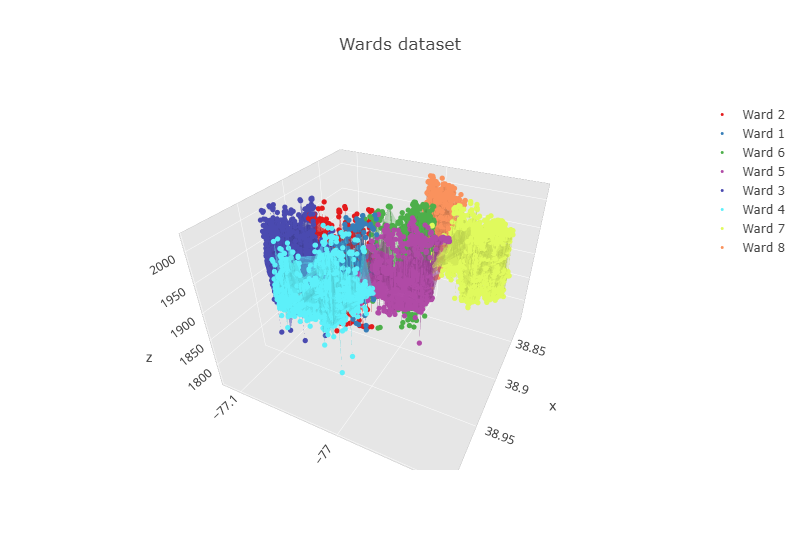

In [19]:
from IPython.display import Image
Image("Data/Top Down.png")

__Offline Bottom Up:__

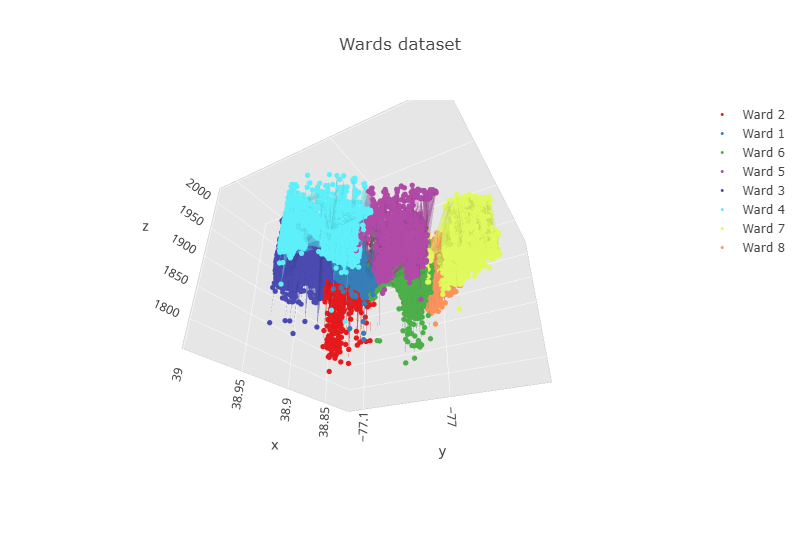

In [20]:
Image("Data/BottomUp.png")

***
## Modeling and Evaluation  
<font color=DarkRed>Different tasks will require different evaluation methods. Be as thorough as possible when analyzing
the data you have chosen and use visualizations of the results to explain the performance and
expected outcomes whenever possible. Guide the reader through your analysis with plenty of
discussion of the results.</font>

***
## Modeling and Evaluation 1
<font color=blue>Train and adjust parameters</font>  
<font color=DarkRed>Perform cluster analysis using several clustering methods (adjust parameters)</font>   

___"we can cluster first and then perform principal components analysis"__
__"Rather than KNN on entire dataset we can we can cluster first and then KNN to reduce the number of comparisons we need to do"__

In [21]:
# One-hot encode the categorical data
tmp_df2 = pd.get_dummies(df.WARD,prefix='WARD')
tmp_df3 = pd.get_dummies(df.YR_RMDL_ClASS,prefix='YR_RMDL_ClASS')
df_imputed = pd.concat((df,tmp_df3,tmp_df2),axis=1)
# Delete unnecessary attributes
df_imputed.drop(['OBJECTID','SSL','YR_RMDL_ClASS','ASSESSMENT_NBHD','WARD'], axis=1, inplace=True)
#Map amd convert the AC attribute to binary
mapping = {'Y': 1, 'N': -1}
df_imputed = df_imputed.replace({'AC': mapping})
df_imputed['AC']=df_imputed['AC'].astype(np.int64)
#Normalize the data
df_temp = (df_imputed-df_imputed.mean())/df_imputed.std()
df_final = pd.concat([df_temp, df.ASSESSMENT_NBHD], axis=1)
df_final.head(5)

,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,STORIES,SALE_NUM,...,YR_RMDL_ClASS_NONE,WARD_Ward 1,WARD_Ward 2,WARD_Ward 3,WARD_Ward 4,WARD_Ward 5,WARD_Ward 6,WARD_Ward 7,WARD_Ward 8,ASSESSMENT_NBHD
0,2.268314,-0.980715,-0.131457,0.797431,1.51811,0.450300,0.778751,-0.848536,1.981537,-0.485298,...,-1.096548,-0.287602,4.36798,-0.36469,-0.492506,-0.461523,-0.42708,-0.413537,-0.305371,Old City 2
1,1.180226,0.693838,-0.131457,0.797431,1.51811,2.002033,1.829684,-1.282753,1.981537,-0.485298,...,-1.096548,-0.287602,4.36798,-0.36469,-0.492506,-0.461523,-0.42708,-0.413537,-0.305371,Old City 2
2,1.180226,0.693838,1.050588,0.797431,1.51811,0.967544,1.829684,-0.848536,1.981537,1.072811,...,-1.096548,-0.287602,4.36798,-0.36469,-0.492506,-0.461523,-0.42708,-0.413537,-0.305371,Old City 2
3,1.180226,0.693838,1.050588,0.797431,1.51811,0.450300,1.829684,-1.210384,1.981537,-0.485298,...,-1.096548,-0.287602,4.36798,-0.36469,-0.492506,-0.461523,-0.42708,-0.413537,-0.305371,Old City 2
4,-0.995950,-0.980715,-0.131457,0.797431,1.51811,-1.101434,-1.323116,-0.595242,-0.008090,-0.485298,...,-1.096548,-0.287602,4.36798,-0.36469,-0.492506,-0.461523,-0.42708,-0.413537,-0.305371,Old City 2


__Initial Model:__ Determine Assessment Neighborhood from all other Variables.  

Below our simple raw model can classify observations into the correct assessment neighborhood at about 73 percent accurracy. However we are *thankfully* getting warnings from sklearn that we have fewer class members in our sample than our 10 folds. 

*Warning:
The least populated class in y has only 6 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.*

In [24]:
# run logistic regression and vary some parameters using sample of 10,000 obs
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, cross_val_score
df = df_final.sample(10000)
# We classify the assessment neighborhood (y) as follows:
if 'ASSESSMENT_NBHD' in df:
    y = df['ASSESSMENT_NBHD'].values # get the labels we want
    del df['ASSESSMENT_NBHD'] # get rid of the class label
    X = df.values # use everything else to predict!
cv = StratifiedKFold(n_splits=10)
lr_clf = LogisticRegression(penalty='l2', C=1.0, class_weight=None) # get object
acc = cross_val_score(lr_clf,X,y=y,cv=cv)
print ("Average accuracy = ", acc.mean()*100, "+-", acc.std()*100)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning:

The least populated class in y has only 6 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.



Average accuracy =  73.3811105487235 +- 1.4373869665714367


So we try lowering the number of folds. The sklearn warning is gone and the statistical error has improved however our accuracy has decreased almost a full percent.

In [27]:
# run logistic regression and vary some parameters using sample of 10,000 obs
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, cross_val_score
df = df_final.sample(10000)
# We classify the assessment neighborhood (y) as follows:
if 'ASSESSMENT_NBHD' in df:
    y = df['ASSESSMENT_NBHD'].values # get the labels we want
    del df['ASSESSMENT_NBHD'] # get rid of the class label
    X = df.values # use everything else to predict!
cv = StratifiedKFold(n_splits=4)
lr_clf = LogisticRegression(penalty='l2', C=1.0, class_weight=None) # get object
acc = cross_val_score(lr_clf,X,y=y,cv=cv)
print ("Average accuracy = ", acc.mean()*100, "+-", acc.std()*100)

Average accuracy =  72.57598509524018 +- 0.8725861792186993


So we try taking a larger sample (20,000) with 10 folds. Our accuracy improves by almost 3% and error is compoarable.

In [30]:
# run logistic regression and vary some parameters using sample of 20,000 obs
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, cross_val_score
df = df_final.sample(20000)
# We classify the assessment neighborhood (y) as follows:
if 'ASSESSMENT_NBHD' in df:
    y = df['ASSESSMENT_NBHD'].values # get the labels we want
    del df['ASSESSMENT_NBHD'] # get rid of the class label
    X = df.values # use everything else to predict!
cv = StratifiedKFold(n_splits=10)
lr_clf = LogisticRegression(penalty='l2', C=1.0, class_weight=None) # get object
acc = cross_val_score(lr_clf,X,y=y,cv=cv)
print ("Average accuracy = ", acc.mean()*100, "+-", acc.std()*100)

Average accuracy =  75.35333927329403 +- 0.9736740383718646


__Feature Engineering__  
Now we try doing some feature engineering. We start by using the K-means algorithm on Residences with Air Conditioning Units and Gross Building Area in square feet (GBA).

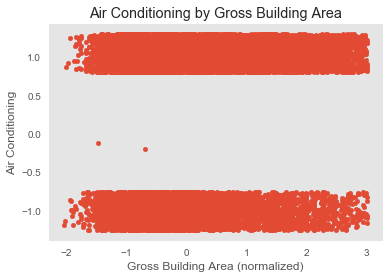

In [31]:
from matplotlib import pyplot as plt
plt.style.use("ggplot")
%matplotlib inline
X1 = df[['AC','GBA']].values
plt.scatter(X1[:, 1], X1[:, 0]+np.random.random(X1[:, 1].shape)/2, s=20)
plt.xlabel('Gross Building Area (normalized)'), plt.ylabel('Air Conditioning')
plt.grid()
plt.title('Air Conditioning by Gross Building Area')
plt.show()

### KMeans

For n_clusters = 3 The average silhouette_score is : 0.36
For n_clusters = 5 The average silhouette_score is : 0.24
For n_clusters = 7 The average silhouette_score is : 0.25
For n_clusters = 9 The average silhouette_score is : 0.25
For n_clusters = 11 The average silhouette_score is : 0.26


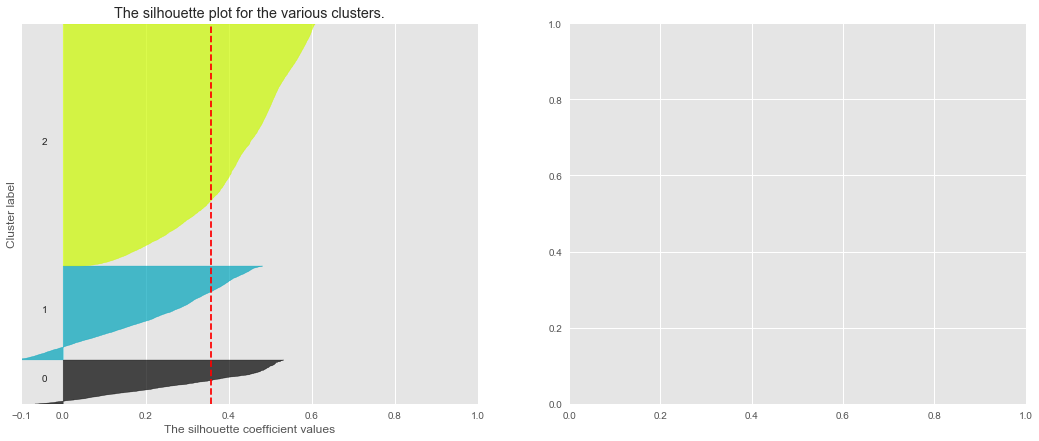

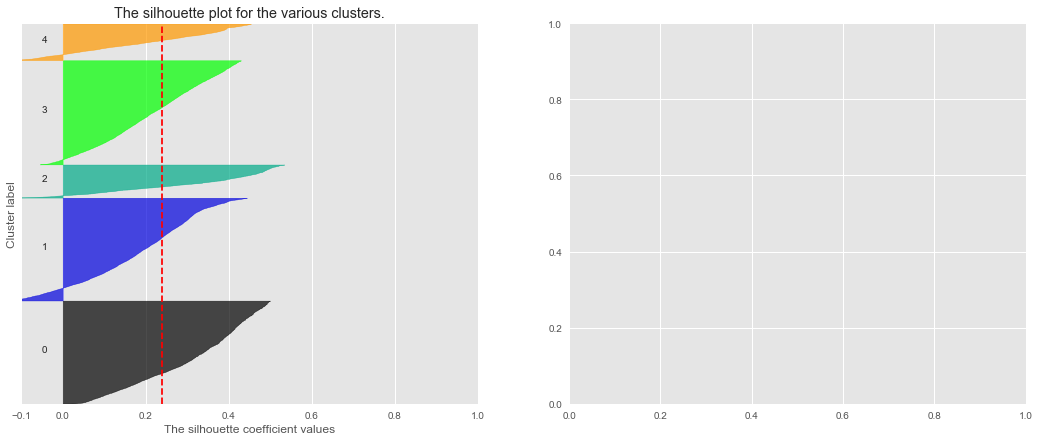

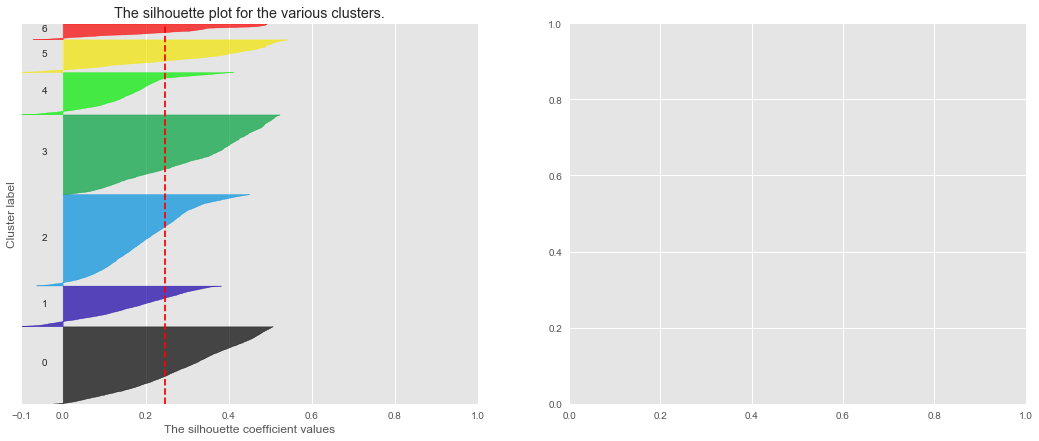

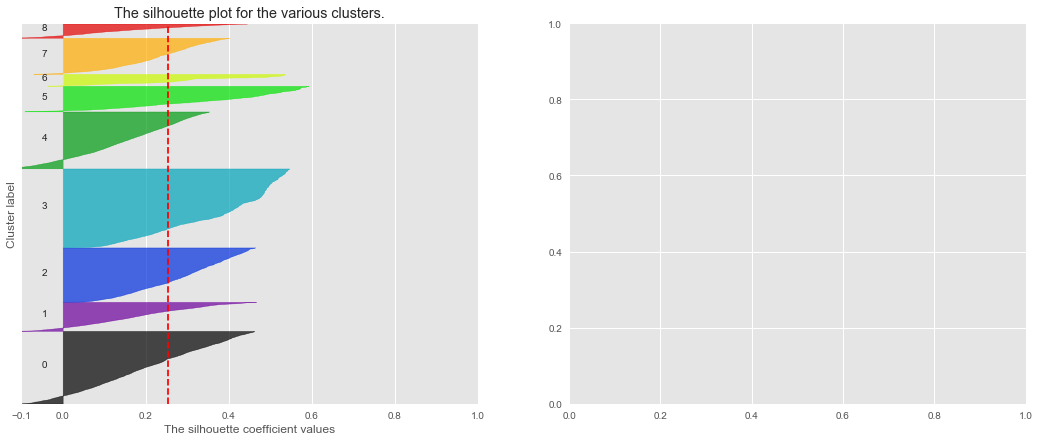

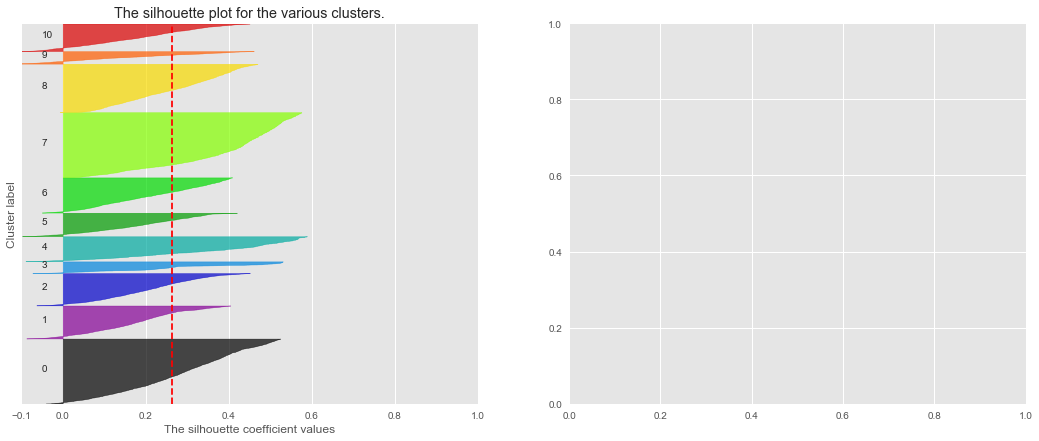

Wall time: 1min 38s


In [33]:
%%time
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import matplotlib.cm as cm

X1 = df[['BATHRM','ROOMS','AYB','GBA']]
range_n_clusters = [3,5,7,9,11]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X1) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X1)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X1, cluster_labels)
    #X = np.column_stack((X,pd.get_dummies(cluster_labels)))
    #acc = cross_val_score(lr_clf,X,y=y,cv=5)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", round(silhouette_avg,2),
        # "Average accuracy (with kmeans for class/fare)= ", round(acc.mean()*100,2), "+-", round(acc.std()*100,2)
         )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X1, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
plt.show()

### DBSCAN

In [34]:
%%time
X1 = df[['BATHRM','ROOMS','AYB','GBA']]
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import matplotlib.cm as cm
for eps in [0.1, 1, 10]:
    for mpts in [2,4,8]:
        DBSCAN_cluster_labels = DBSCAN(eps=eps, min_samples=mpts).fit_predict(X1)
        silhouette_avg = silhouette_score(X1,  DBSCAN_cluster_labels)
        print("For eps =", eps,
          "For mpts =", mpts,
          "The average silhouette_score is :", round(silhouette_avg,2))

For eps = 0.1 For mpts = 2 The average silhouette_score is : -0.16
For eps = 0.1 For mpts = 4 The average silhouette_score is : -0.23
For eps = 0.1 For mpts = 8 The average silhouette_score is : -0.3
For eps = 1 For mpts = 2 The average silhouette_score is : 0.16
For eps = 1 For mpts = 4 The average silhouette_score is : 0.17
For eps = 1 For mpts = 8 The average silhouette_score is : 0.16


ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)

### Agglomerative

In [35]:
%%time 

from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import kneighbors_graph
from sklearn.metrics import silhouette_samples, silhouette_score

X1 = df[['BATHRM','ROOMS','AYB','GBA']]

knn_graph = kneighbors_graph(X1, 30, include_self=False)

for link in ['complete', 'average']:  #'ward', 
    for n_cls in [3,5,7,9,11]:

        # Fit model and get labels
        cls_agg_labels = AgglomerativeClustering(n_clusters=n_cls, linkage=link, connectivity=knn_graph).fit_predict(X1)
        
        # get the silhouette score
        silhouette_avg = silhouette_score(X1, cls_agg_labels)

        # Output
        print ("For Linkage type: ", link, "and number of clusters = ", n_cls, \
               ":  The Average Silhouette Score is ", silhouette_avg)

For Linkage type:  complete and number of clusters =  3 :  The Average Silhouette Score is  0.6895554580448041
For Linkage type:  complete and number of clusters =  5 :  The Average Silhouette Score is  0.5325754434939831
For Linkage type:  complete and number of clusters =  7 :  The Average Silhouette Score is  0.503806023593254
For Linkage type:  complete and number of clusters =  9 :  The Average Silhouette Score is  0.47295496674257176
For Linkage type:  complete and number of clusters =  11 :  The Average Silhouette Score is  0.4581229679735125
For Linkage type:  average and number of clusters =  3 :  The Average Silhouette Score is  0.6895554580448041
For Linkage type:  average and number of clusters =  5 :  The Average Silhouette Score is  0.6819809930591828
For Linkage type:  average and number of clusters =  7 :  The Average Silhouette Score is  0.49920318018177057
For Linkage type:  average and number of clusters =  9 :  The Average Silhouette Score is  0.48787319752081565
Fo

***
## Modeling and Evaluation 2
<font color=blue>Evaluate and Compare</font>  
<font color=darkred>Use internal and/or external validation measures to describe and compare the clusterings and the clusters— how did you determine a suitable number of clusters for each method?</font>

For n_clusters = 2 The average silhouette_score is : 0.57 Average accuracy (with kmeans for class/fare)=  75.12 +- 0.58
For n_clusters = 3 The average silhouette_score is : 0.61 Average accuracy (with kmeans for class/fare)=  75.27 +- 0.57
For n_clusters = 4 The average silhouette_score is : 0.62 Average accuracy (with kmeans for class/fare)=  75.35 +- 0.59
For n_clusters = 5 The average silhouette_score is : 0.59 Average accuracy (with kmeans for class/fare)=  75.34 +- 0.66
For n_clusters = 6 The average silhouette_score is : 0.56 Average accuracy (with kmeans for class/fare)=  75.2 +- 0.71
For n_clusters = 7 The average silhouette_score is : 0.55 Average accuracy (with kmeans for class/fare)=  75.14 +- 0.55
For n_clusters = 8 The average silhouette_score is : 0.54 Average accuracy (with kmeans for class/fare)=  75.26 +- 0.56
For n_clusters = 9 The average silhouette_score is : 0.54 Average accuracy (with kmeans for class/fare)=  75.34 +- 0.57
For n_clusters = 10 The average silhouett

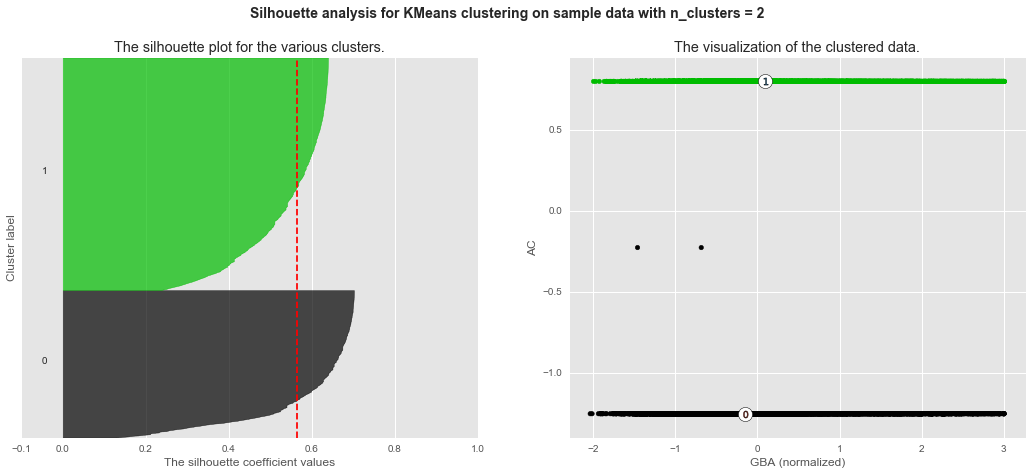

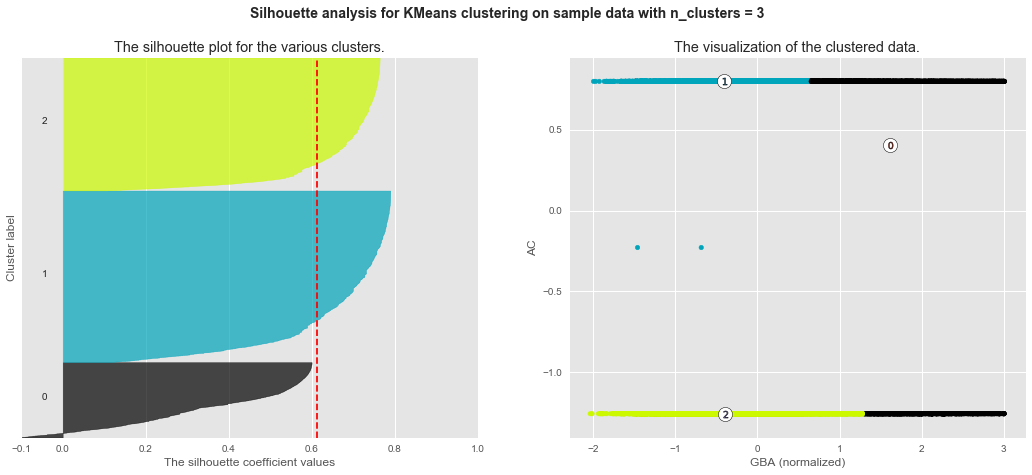

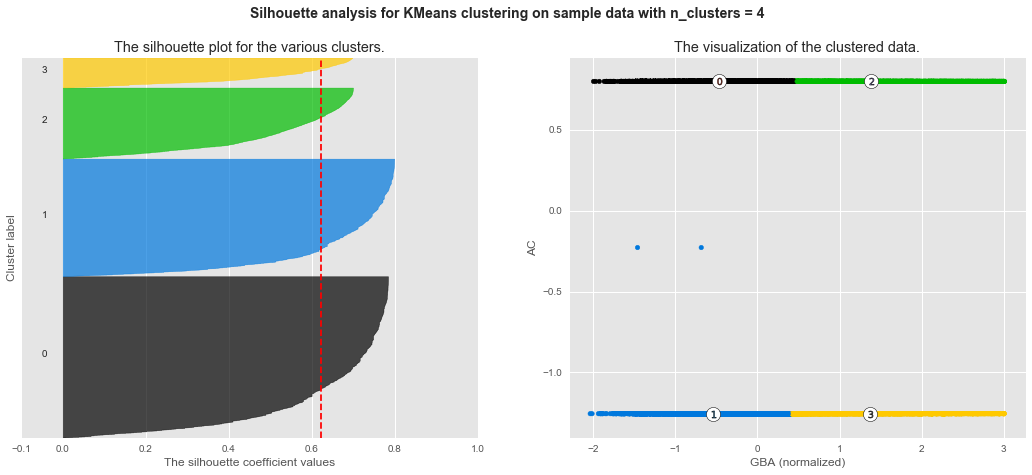

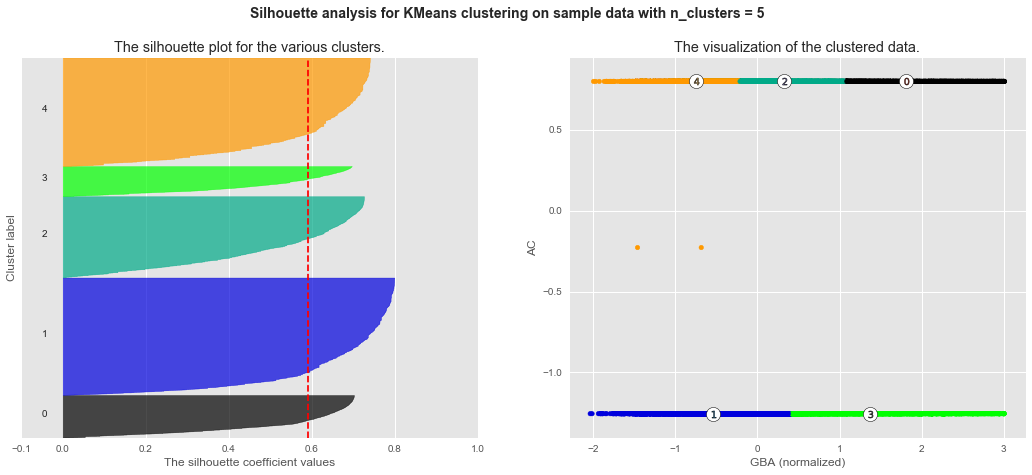

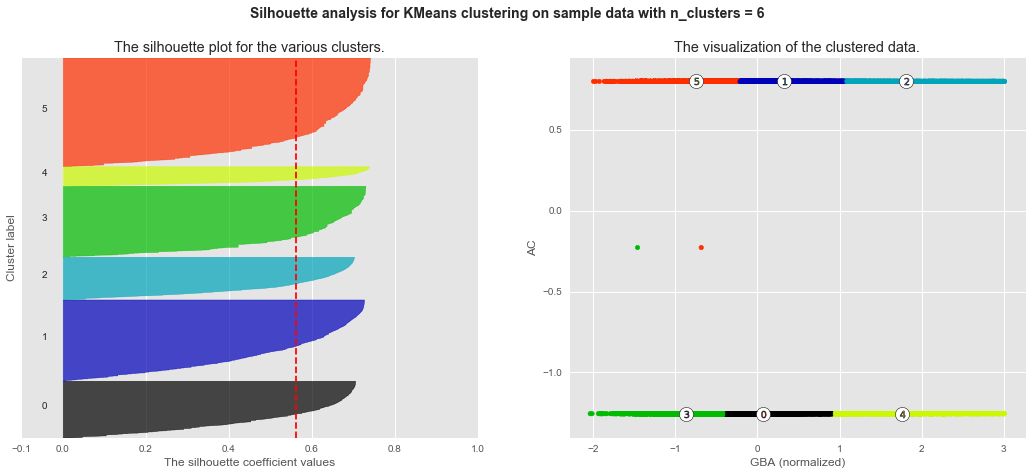

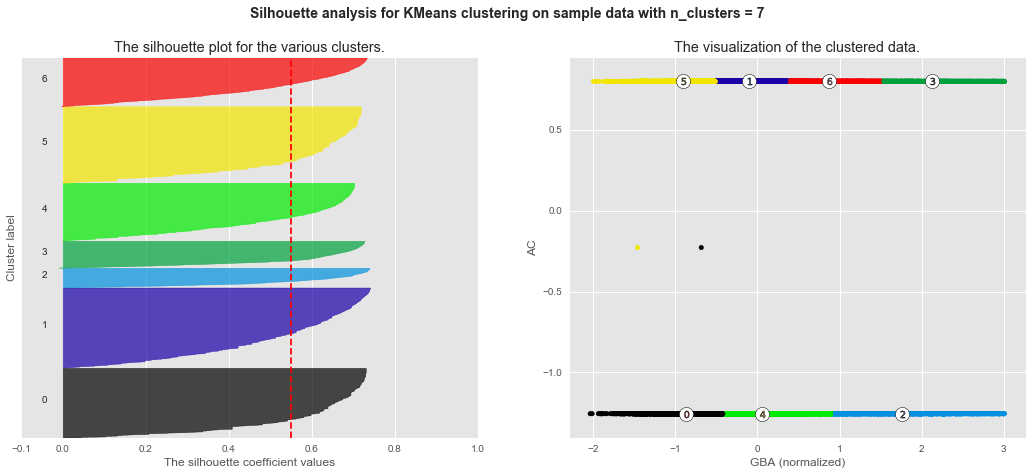

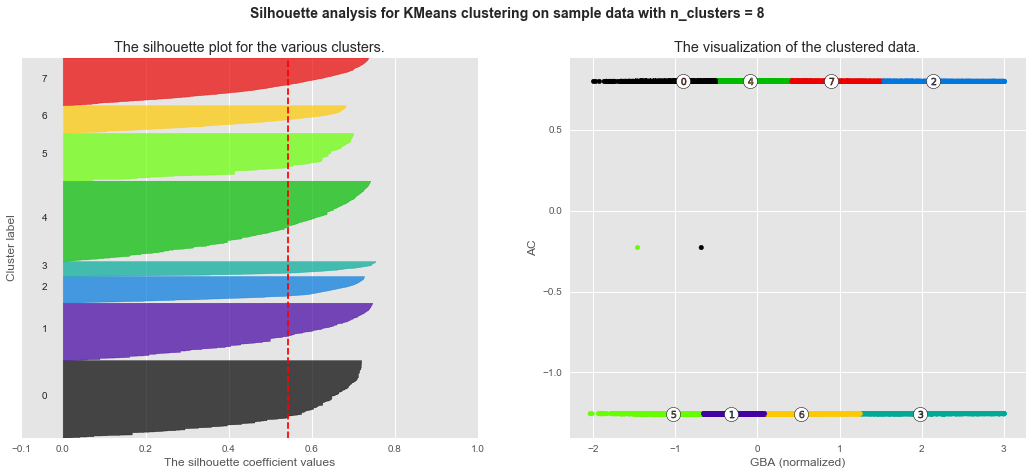

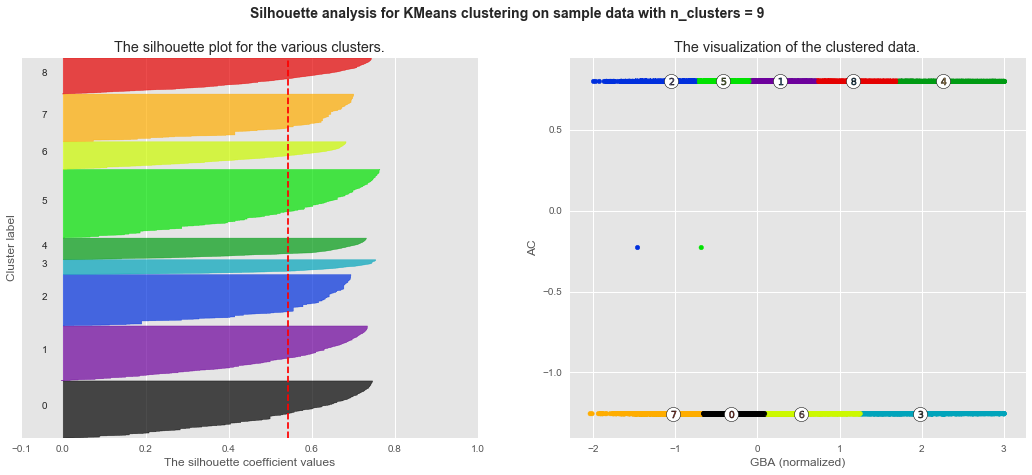

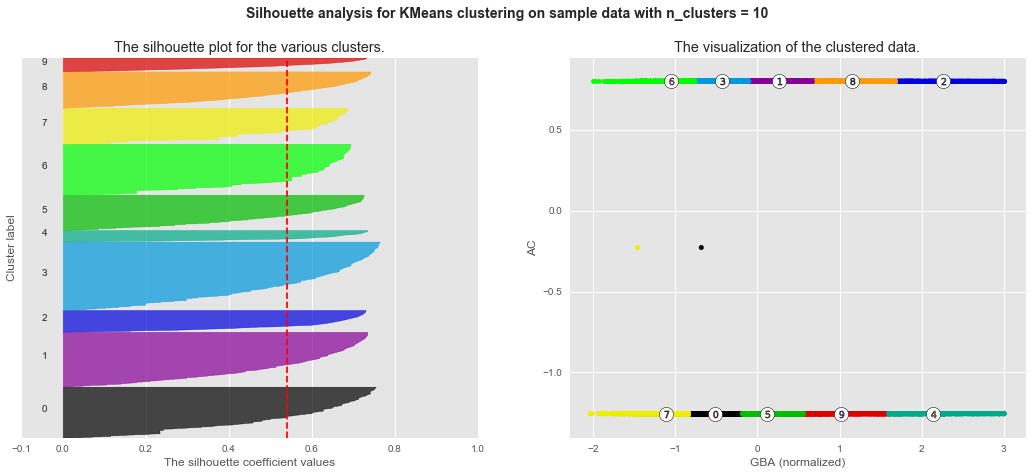

Wall time: 13min 41s


In [32]:
%%time
#This code was inspired by https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import matplotlib.cm as cm

X1 = df[['GBA','AC']]

range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X1) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X1)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X1, cluster_labels)
    X = np.column_stack((X,pd.get_dummies(cluster_labels)))
    acc = cross_val_score(lr_clf,X,y=y,cv=5)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", round(silhouette_avg,2),
         "Average accuracy (with kmeans for class/fare)= ", round(acc.mean()*100,2), "+-", round(acc.std()*100,2))

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X1, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X1['GBA'], X1['AC'], s=20,
                c=colors)

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("GBA (normalized)")
    ax2.set_ylabel("AC")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

The silhouette plot shows that the n_clusters value of 3 is a bad pick for the given data due to the presence of cluster with below average silhouette scores and also due to wide fluctuations in the size of the silhouette plots. Silhouette analysis is more ambivalent in deciding between 2 and 4. After review of silhouette plots using n_clusters value of 2 and 4, we can pick the one that provided higher silhouette score, that is n_clusters=4 with silhouette score=0.62.

silhouette score, that is n_clusters=4 with silhouette score=0.62.
Let's now try adding in different discretization of the features.

In [ ]:
%%time
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import matplotlib.cm as cm

X1 = df[['LATITUDE','LONGITUDE']]
range_n_clusters = [4,5,6,7,8,9,10]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X1) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X1)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X1, cluster_labels)
    X = np.column_stack((X,pd.get_dummies(cluster_labels)))
    acc = cross_val_score(lr_clf,X,y=y,cv=5)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", round(silhouette_avg,2),
         "Average accuracy (with kmeans for LATITUDE/LONGITUDE)= ", round(acc.mean()*100,2), "+-", round(acc.std()*100,2))

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X1, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X1['LATITUDE'], X1['LONGITUDE'], s=20,
                c=colors)

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("LATITUDE (normalized)")
    ax2.set_ylabel("LONGITUDE (normalized)")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

The highest silhouette score for clustering of attributes LATITUDE and LONGITUDE is 0.47 with n_clusters = 8. And this result agrees with total of 8 wards that we have in the data set.  

Now lets do DBSCAN clustering for attributes: AYB (the earliest time when the main portion of builfing was built), SALE_NUM.  

In [ ]:
%%time

from sklearn.cluster import DBSCAN
import numpy as np
import pandas as pd
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import matplotlib.cm as cm

X1 = df[['LATITUDE','LONGITUDE']]

for eps in [0.125, 0.13, 0.14]:
    for mpts in [20, 30, 40]:
    
        cls_fam = DBSCAN(eps=eps, min_samples=mpts)
        cluster_labels = cls_fam.fit_predict(X1)

        silhouette_avg = silhouette_score(X1, cluster_labels)
        X = np.column_stack((X,pd.get_dummies(cluster_labels)))
        acc = cross_val_score(lr_clf,X,y=y,cv=5)
        print("For eps =", eps,
          "For mpts =", mpts,
          "The average silhouette_score is :", round(silhouette_avg,2),
         "Average accuracy (with DBSCAN for LATITUDE/LONGITUDE)= ", round(acc.mean()*100,2), "+-", round(acc.std()*100,2))  

  

***
## Modeling and Evaluation 3
<font color=blue>Visualize Results</font>  
<font color=darkred>Use tables/visualization to discuss the found results. Explain each visualization in detail. </font>  

In [ ]:
data = X1

cls = DBSCAN(eps=0.13, min_samples=40)
cls.fit(data)
dbs_labels = cls.labels_ 

fig = plt.figure(figsize=(12,8))
title = ['DBSCAN']
for i,l in enumerate([dbs_labels]):
    
    plt.subplot(3,2,2*i+1)
    plt.scatter(data['LATITUDE'], data['LONGITUDE']+np.random.random(data['LONGITUDE'].shape)/2, c=l, cmap=plt.cm.rainbow, s=20, linewidths=0)
    plt.xlabel('LATITUDE'), plt.ylabel('LONGITUDE')
    plt.grid()
    plt.title(title)

***
## Modeling and Evaluation 4  
<font color=blue>Summarize the Ramifications</font>  
<font color=darkred>__Summarize__: Describe your results. What findings are the most interesting and why?</font>  

***
## Deployment
<font color=blue>Be critical of your performance and tell the reader how you current model might be usable by other parties. Did you achieve your goals? If not, can you reign in the utility of your modeling? How useful is your model for interested parties (i.e., the companies or organizations that might want to use it)? How would your deploy your model for interested parties? What other data should be collected? How often would the model need to be updated, etc.?</font>  
Blah derper blah blah blah.  

***
## Exceptional Work  
<font color=blue>You have free reign to provide additional analyses or combine analyses.</font>  

Blah blah. Blah blah blah BLAH!  

In [ ]:
df.groupby(['WARD']).OBJECTID.count()

In [ ]:
df.groupby(['ASSESSMENT_NBHD']).OBJECTID.count()